In [141]:
%pwd

'd:\\Metro\\research'

In [143]:
import os
os.chdir("../")

In [144]:
%pwd

'd:\\Metro'

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [110]:
df["holiday"].value_counts()

holiday
Labor Day                    7
Thanksgiving Day             6
Christmas Day                6
New Years Day                6
Martin Luther King Jr Day    6
Columbus Day                 5
Veterans Day                 5
Washingtons Birthday         5
Memorial Day                 5
Independence Day             5
State Fair                   5
Name: count, dtype: int64

In [111]:
#holiday column has full of null values so dropping
df.drop('holiday',axis = 1,inplace = True)

In [112]:
print(df["weather_main"].value_counts())

weather_main
Clouds          15164
Clear           13391
Mist             5950
Rain             5672
Snow             2876
Drizzle          1821
Haze             1360
Thunderstorm     1034
Fog               912
Smoke              20
Squall              4
Name: count, dtype: int64


In [113]:
print(df["weather_description"].value_counts())

weather_description
sky is clear                           11665
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
Sky is Clear                            1726
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain       

In [114]:
df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], prefix=['weather_main', 'weather_desc'])

In [115]:
for i in df.columns:
    if df[i].dtype == object:
        print(i)

date_time


In [116]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%Y-%m-%d %H:%M:%S')

# Extract Date Features
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['day_of_week'] = df['date_time'].dt.dayofweek
df['day_of_year'] = df['date_time'].dt.dayofyear

# Extract Time Features
df['hour'] = df['date_time'].dt.hour
df['minute'] = df['date_time'].dt.minute


# Create a new DataFrame for the modified 'date_time' column
new_df = df.copy()

# Drop the 'date_time' column from the original DataFrame
df.drop(columns=['date_time'], inplace=True)

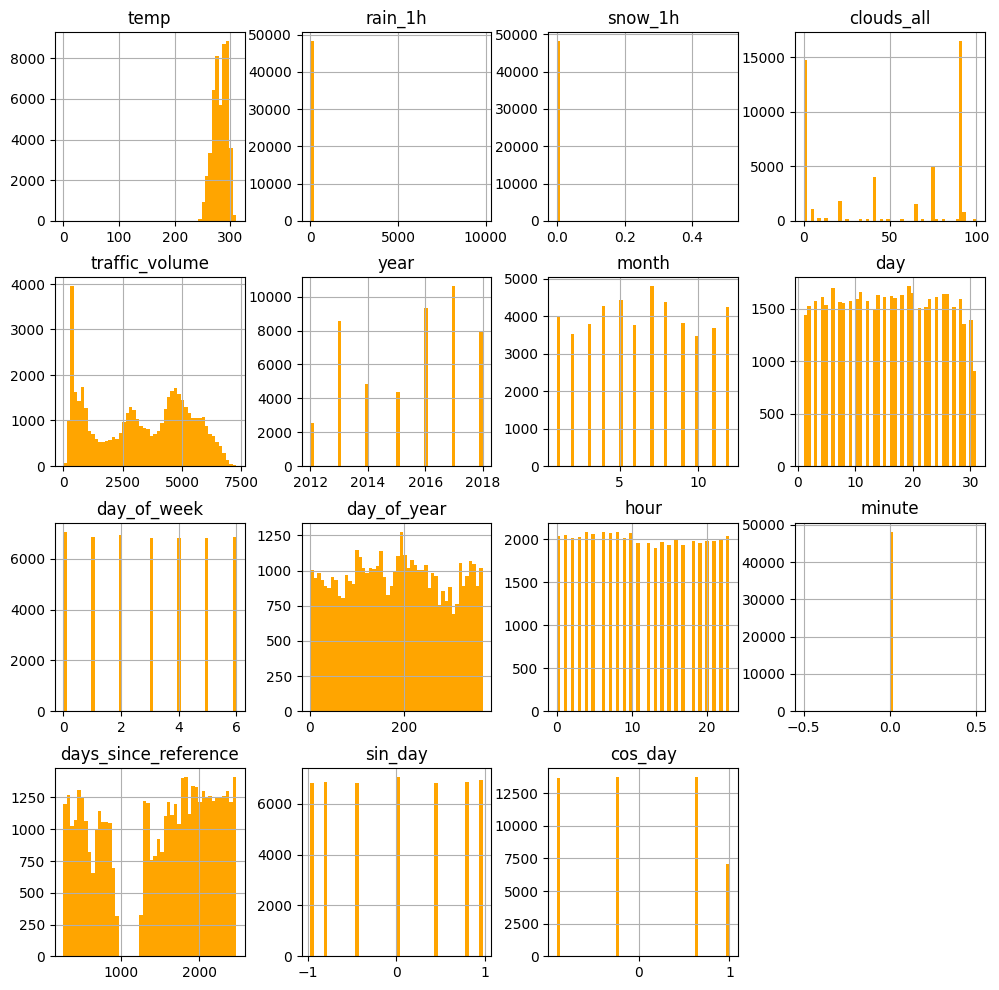

In [117]:
df.hist(bins = 50, figsize = (12,12),color = "orange")
plt.show()

In [118]:
x = df.drop("traffic_volume",axis = 1)
y = df["traffic_volume"]

In [119]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state=43)

In [120]:
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()

In [121]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [122]:
model.score(x_test,y_test)

0.9669001884389351

In [123]:
y_pred = model.predict(x_test)

In [126]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae


191.67079141167926

In [127]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

130502.17020321543

In [128]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


0.9669001884389351

In [131]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

361.25084111073767

In [132]:
from sklearn.metrics import explained_variance_score
explained_var = explained_variance_score(y_test, y_pred)
explained_var

0.9669088920192309

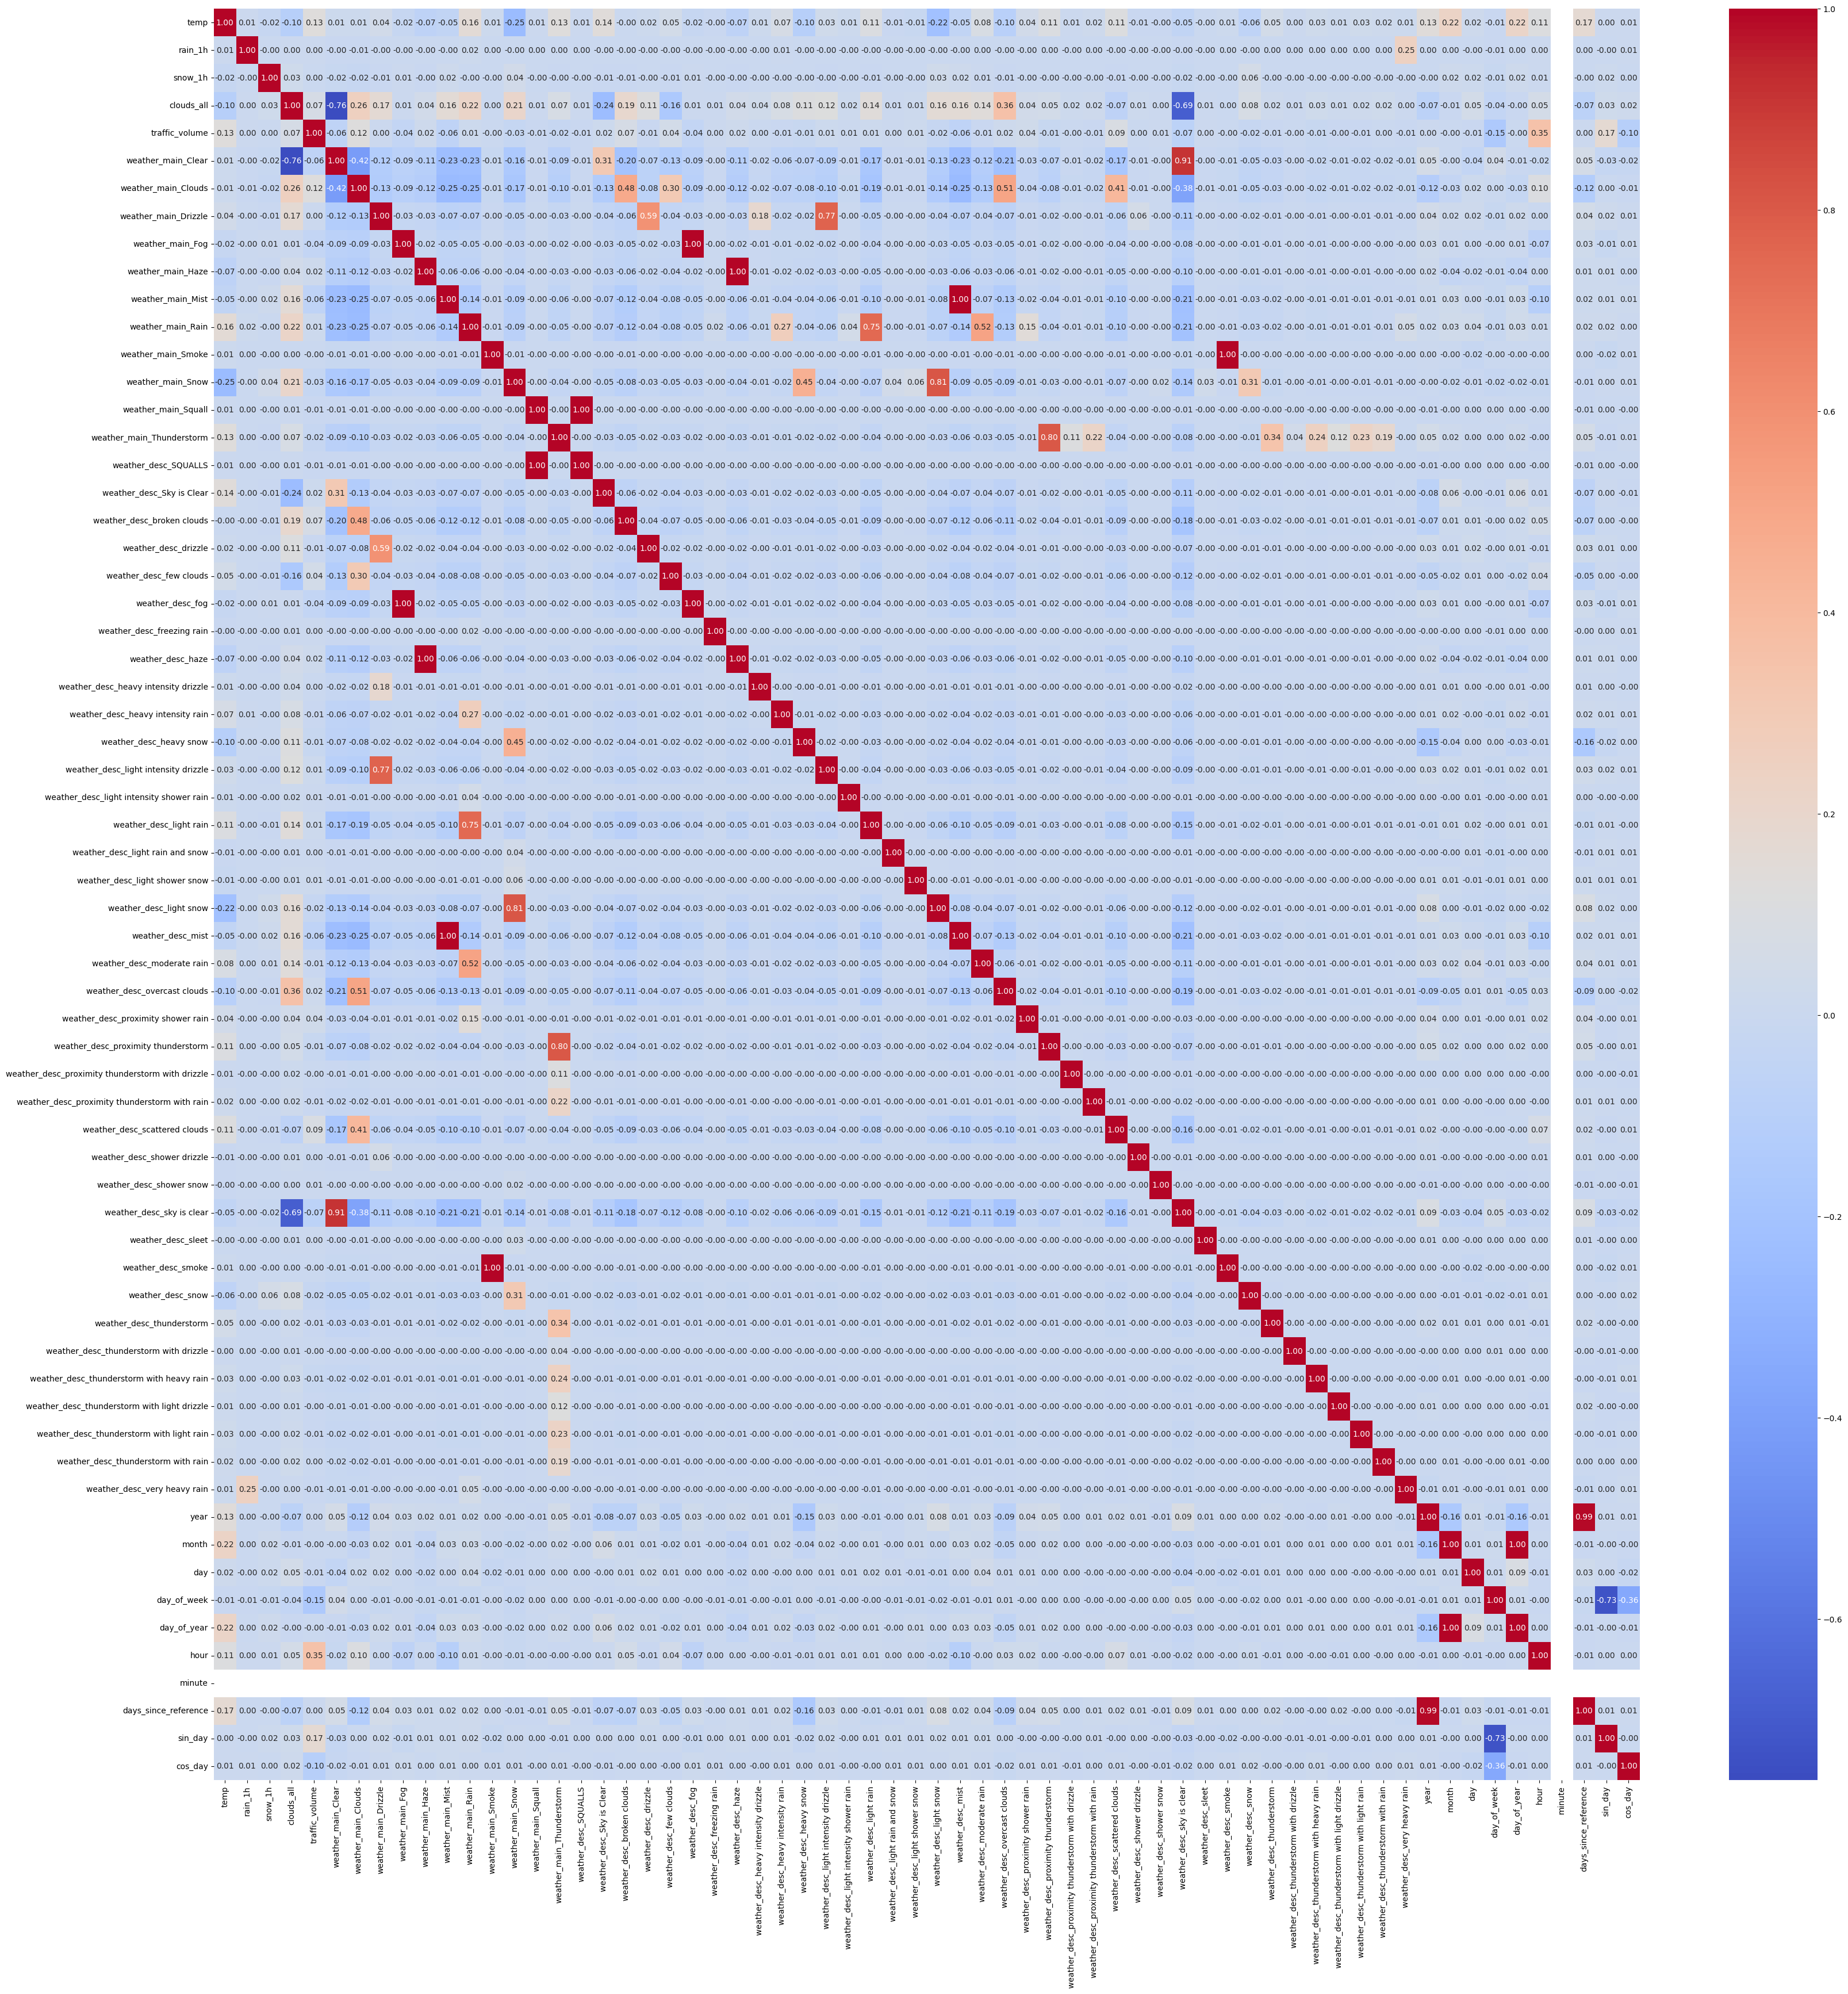

In [139]:
import seaborn as sns

dfcor = df.corr()

plt.figure(figsize=(40,40))

sns.heatmap(dfcor,cmap= 'coolwarm',annot = True,fmt = '.2f')

plt.show()

In [140]:
df

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_main_Clear,weather_main_Clouds,weather_main_Drizzle,weather_main_Fog,weather_main_Haze,...,year,month,day,day_of_week,day_of_year,hour,minute,days_since_reference,sin_day,cos_day
0,288.28,0.0,0.0,40,5545,False,True,False,False,False,...,2012,10,2,1,276,9,0,275,0.781831,0.62349
1,289.36,0.0,0.0,75,4516,False,True,False,False,False,...,2012,10,2,1,276,10,0,275,0.781831,0.62349
2,289.58,0.0,0.0,90,4767,False,True,False,False,False,...,2012,10,2,1,276,11,0,275,0.781831,0.62349
3,290.13,0.0,0.0,90,5026,False,True,False,False,False,...,2012,10,2,1,276,12,0,275,0.781831,0.62349
4,291.14,0.0,0.0,75,4918,False,True,False,False,False,...,2012,10,2,1,276,13,0,275,0.781831,0.62349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,3543,False,True,False,False,False,...,2018,9,30,6,273,19,0,2464,-0.781831,0.62349
48200,282.76,0.0,0.0,90,2781,False,True,False,False,False,...,2018,9,30,6,273,20,0,2464,-0.781831,0.62349
48201,282.73,0.0,0.0,90,2159,False,False,False,False,False,...,2018,9,30,6,273,21,0,2464,-0.781831,0.62349
48202,282.09,0.0,0.0,90,1450,False,True,False,False,False,...,2018,9,30,6,273,22,0,2464,-0.781831,0.62349
